## Observations and Insights 

In [1]:
#My three observations:
    
#    1) The weight of the specimen has a clear correlation to the size of the tumor which skews the validity of the final tumor volume 
#       by Regimen Box plot.
#    2) The best way to represent the relative efficacy of the regimens would be to plot the delta of tumor volume by weight of mice
#    3) There is also a risk that is unidentified in this set. I assume all mice that "stopped" their measurements had died. This is a significant
#       Side effect that needs to be monitored

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#Add numpy for variance
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#MERGE ON MOUSE ID
pyma_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
pyma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
#create dictonary for mouse IDS
mouse_ids = pyma_df["Mouse ID"].unique()
#get length of mouse ID dictionary
num_mice = len(mouse_ids)
num_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#<><><><><><><><><><><><><>><><>
#What other ways of doign this?
#<><><><><><><><><><><><><>><><>

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
#also links to dropping duplicates from dataframe 
mouse_duplicates=pyma_df.duplicated(subset=['Mouse ID','Timepoint'],keep='first')
mouse_duplicates
#this above returns a boolean series of true/false denoting duplicate rows (and corresponding IDs)
#how to print the "True"?
#Filtering with boolean index? what is the difference between index and series? Wouldn't the 2 column series be an index?
#https://mode.com/python-tutorial/python-filtering-with-boolean-indexes/
#As with their homepage index, use the mouse_duplicates to filter data
#selects true rows recorded
duplicate_id=pyma_df[mouse_duplicates]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# See above
duplicate_id=pyma_df[mouse_duplicates]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates
#keep last
clean_pyma_df = pyma_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_pyma_df['Mouse ID'])
print(f" Number of Mice in Clean DataFrame is {num_mice}")

num_micewduplicates = len(pyma_df['Mouse ID'])
print(f" Number of Mice in original data set is: {num_micewduplicates}")

#Run quick check
num_duplicates=len(pyma_df[mouse_duplicates])
print(f" Number of Duplicates is: {num_duplicates}")
dup_check = num_micewduplicates - num_mice
print(f" The difference in number of lost columns is: {dup_check}")


 Number of Mice in Clean DataFrame is 1888
 Number of Mice in original data set is: 1893
 Number of Duplicates is: 5
 The difference in number of lost columns is: 5


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_pyma_df

regimen_df =clean_pyma_df.groupby("Drug Regimen")



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regimen_df["Tumor Volume (mm3)"].mean()
#print(regimen_mean)
#median
regimen_median = regimen_df["Tumor Volume (mm3)"].median()
#print(regimen_median)
#vaaaaariance
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html
regimen_variance =regimen_df["Tumor Volume (mm3)"].var()
#print(regimen_variance)

regimen_sd = regimen_df["Tumor Volume (mm3)"].std()
#print(regimen_sd)
regimen_sem = regimen_df["Tumor Volume (mm3)"].sem()
#print(regimen_sem)
#create summary Data Frame
regim_summary_df = pd.DataFrame({
    "Tumor Volume Mean": regimen_mean,
    "Tumor Volume Median": regimen_median,
    "Tumor Volume Variance": regimen_variance,
    "Tumor Volume Standard Deviation": regimen_sd,
    "Tumor Volume SEM": regimen_sem    
})
#Test
#regim_summary_df

#now some rounding for readability  from last homework w/o$ but rounded to 2 value

regim_summary_df["Tumor Volume Mean"] = regim_summary_df["Tumor Volume Mean"].map("{:.2f}".format)
regim_summary_df["Tumor Volume Median"] = regim_summary_df["Tumor Volume Median"].map("{:.2f}".format)
regim_summary_df["Tumor Volume Variance"] = regim_summary_df["Tumor Volume Variance"].map("{:.2f}".format)
regim_summary_df["Tumor Volume Standard Deviation"] = regim_summary_df["Tumor Volume Standard Deviation"].map("{:.2f}".format)
regim_summary_df["Tumor Volume SEM"] = regim_summary_df["Tumor Volume SEM"].map("{:.2f}".format)


#Test
regim_summary_df
# Assemble the resulting series into a single summary dataframe.



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#<><><><><><><><><><><><><>><><>
#What is the aggregation method?
#<><><><><><><><><><><><><>><><>

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements taken on each drug regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements Taken'>

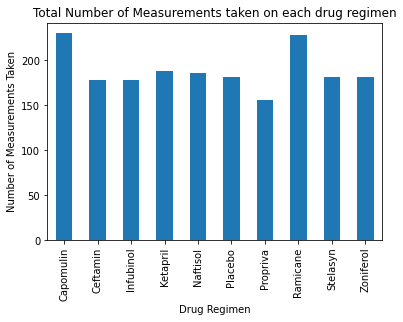

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#My instinct is to create a dictionary for the unique Drug Regimens, and then the counts for 
#<><><><><><><><><><><><><>><><>
# FOR TUTOR
# I picked up this notation off stack overflow but I am not quite understanding exactly how it works
#substituted nuninique to not give me the terms but the series of numbers
#is it the equivalent of naming teh group by and then assigning the nunique() to a secondary
#drug_regimen=clean_pyma_df.groupby('Drug Regimen')
#num_drug_measures
#<><><><><><><><><><><><><>><><>
#https://stackoverflow.com/questions/41415017/count-unique-values-using-pandas-groupby
num_measures = clean_pyma_df.groupby('Drug Regimen')['Timepoint'].count()
num_measures
#substituted nuninique to not give me the terms but the series of numbers
#<><><><><><><><><><><><><>><><>
# using notation from 05 D2 A4
num_measures_bar = num_measures.plot(kind="bar",title="Total Number of Measurements taken on each drug regimen")

num_measures_bar.set_xlabel("Drug Regimen")
num_measures_bar.set_ylabel("Number of Measurements Taken")
num_measures_bar

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0, 0.5, 'Total Number of Measurements')

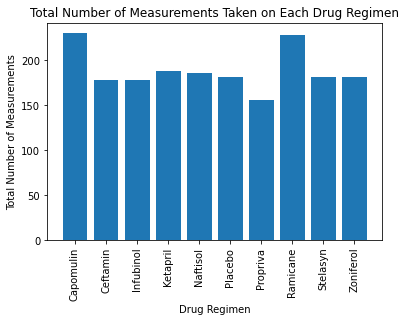

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#got the counted unique values per regimen from above
print(num_measures)
#as in the class work, set x-axi using np.arange (match to length of num measures groupby)
x_axis = np.arange(len(num_measures))
#how to get tick locations D2 Act 1. For loop
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#test Script
print(tick_locations)
#print(num_measures)
plt.bar(x_axis,num_measures)
plt.xticks(tick_locations,num_measures.index, rotation ="vertical")
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")



Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


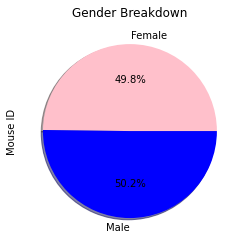

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#groupby the gender, but get number of unique entries for the mouse ID to avoid multiple counts for tests
gender_groupby = clean_pyma_df.groupby("Sex")["Mouse ID"].nunique()
print(gender_groupby)
colors = ["pink","blue"]
gender_groupby_pie = gender_groupby.plot(kind="pie", title="Gender Breakdown",autopct="%1.1f%%",shadow=True,colors=colors)

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


Text(0.5, 1.0, 'Gender Breakdown')

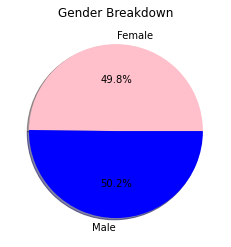

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_groupby = clean_pyma_df.groupby("Sex")["Mouse ID"].nunique()
print(gender_groupby)
colors = ["pink","blue"]
plt.pie(gender_groupby,labels=gender_groupby.index,autopct="%1.1f%%",shadow=True,colors=colors)
plt.title("Gender Breakdown")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#similar to wrestlers
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tvolume = []
#search max according to these values

timepoint_max = clean_pyma_df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()
timepoint_max

treat_merge = pd.merge(clean_pyma_df, timepoint_max,on="Mouse ID",how="inner")
treat_merge
test_filter = treat_merge[treat_merge['Drug Regimen'].isin(treatments)]


#rename time point
test_filter = test_filter.rename(columns={"Timepoint_x":"Timepoint", "Timepoint_y": "Max Timepoint"})
#test_filter_1 = test_filter["Drug Regimen"].unique()
test_filter
#Test Script. Test Run works at removing other items
#print(test_filter_1)
#print(len(test_filter))
#when it came to the box plot, we need to have the index set to the drug regimen name
#test_filter.set_index("Drug Regimen")
#test_filter.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1863,z581,Infubinol,Female,24,25,25,54.316407,2,45
1864,z581,Infubinol,Female,24,25,30,56.286750,2,45
1865,z581,Infubinol,Female,24,25,35,58.628399,3,45
1866,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [15]:
for treatment in treatments:
    #create filter to only match when Drug regiment = treatment
    test_filter2 = test_filter.loc[test_filter["Drug Regimen"] == treatment]
    #loc to filter out all data where timepoint is max timepoint
    tvolume_df = test_filter2.loc[test_filter2["Timepoint"] == test_filter2["Max Timepoint"]]
    tvolume_df = tvolume_df.set_index("Drug Regimen")
    volume = tvolume_df["Tumor Volume (mm3)"]
    tvolume.append(volume)
    
    #use quartile from D3 E2
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of volume for {treatment} is: {lowerq}")
    print(f"The upper quartile of volume for {treatment} is: {upperq}")
    print(f"The interquartile range of volumes for {treatment} is: {iqr}")
    print(f"The the median of volumes for {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    

The lower quartile of volume for Capomulin is: 32.37735684
The upper quartile of volume for Capomulin is: 40.1592203
The interquartile range of volumes for Capomulin is: 7.781863460000004
The the median of volumes for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of volume for Ramicane is: 31.56046955
The upper quartile of volume for Ramicane is: 40.65900627
The interquartile range of volumes for Ramicane is: 9.098536719999998
The the median of volumes for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of volume for Infubinol is: 54.04860769
The upper quartile of volume for Infubinol is: 65.52574285
The interquartile range of volumes for Infubinol is: 11.477135160000003
The the median of volumes for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.7414

In [16]:
tvolume



[Drug Regimen
 Capomulin    23.343598
 Capomulin    28.484033
 Capomulin    28.430964
 Capomulin    30.485985
 Capomulin    31.023923
 Capomulin    31.896238
 Capomulin    32.377357
 Capomulin    33.329098
 Capomulin    34.455298
 Capomulin    37.311846
 Capomulin    36.041047
 Capomulin    37.074024
 Capomulin    38.846876
 Capomulin    38.939633
 Capomulin    38.982878
 Capomulin    38.753265
 Capomulin    38.125164
 Capomulin    39.952347
 Capomulin    40.658124
 Capomulin    40.159220
 Capomulin    40.728578
 Capomulin    41.483008
 Capomulin    41.581521
 Capomulin    47.685963
 Capomulin    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 Drug Regimen
 Ramicane    22.050126
 Ramicane    29.128472
 Ramicane    30.276232
 Ramicane    30.564625
 Ramicane    30.638696
 Ramicane    31.560470
 Ramicane    31.095335
 Ramicane    33.397653
 Ramicane    32.978522
 Ramicane    33.562402
 Ramicane    36.134852
 Ramicane    38.810366
 Ramicane    37.225650
 Ramicane    36.374510
 Ramica

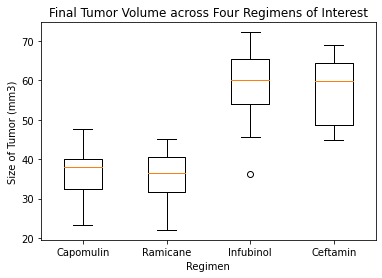

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#build plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume across Four Regimens of Interest')
ax1.set_ylabel('Size of Tumor (mm3)')
ax1.set_xlabel('Regimen')
ax1.boxplot(tvolume)
#https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([1, 2, 3,4], treatments)
plt.show()



## Line and Scatter Plots

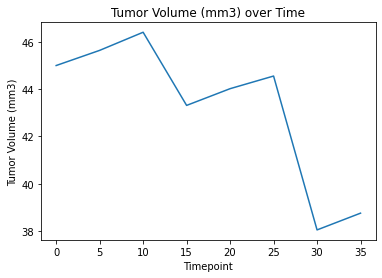

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Grab a mouse with Regimen of capomulin
test_filter_cap = test_filter.loc[test_filter["Drug Regimen"] == "Capomulin"]
test_filter_cap_u = test_filter_cap["Mouse ID"].unique()
test_filter_cap_u

#R157 sounds good
test_filter_cap_r = test_filter_cap.loc[test_filter["Mouse ID"] == "j246"]
test_filter_cap_r

x_axis = test_filter_cap_r["Timepoint"]
points = test_filter_cap_r["Tumor Volume (mm3)"]
plt.plot(x_axis, points)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) over Time")
plt.show()

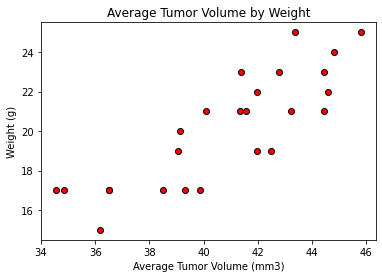

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#we can utilize the previous dataframe
test_filter_cap
#Average weight per mouse
average_weight = test_filter_cap.groupby("Mouse ID")["Weight (g)"].mean()
average_weight
#ITS NOT AH TUMAH https://www.youtube.com/watch?v=t_FRWUPcR7Y
average_tumor = test_filter_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor

plt.scatter(average_tumor,average_weight, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average Tumor Volume by Weight")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
25
25


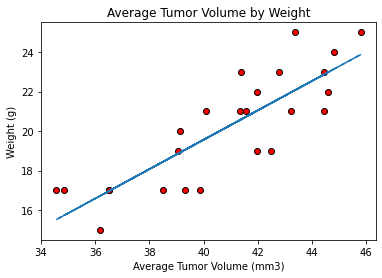

In [20]:
# Calculate the correlation coefficient and linear regression model 
#print(test_filter_cap)
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(average_tumor,average_weight)[0],2)}")
m_weight = test_filter_cap.groupby("Mouse ID")["Weight (g)"]
print(len(m_weight))
print(len(average_tumor))

#linear regression on weight versus volume
wv_slope,wv_int,wv_r,wv_p,wv_std_err = st.linregress(average_tumor,average_weight)
#create equation of line to calculate predicted weight for tumor size
#y=mx+b
wv_fit = wv_slope*average_tumor+wv_int
plt.scatter(average_tumor,average_weight, marker="o", facecolors="red", edgecolors="black")
plt.plot(average_tumor,wv_fit,"--")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Average Tumor Volume by Weight")
plt.show()
